In [ ]:
pip install plotly

#### import libraries

In [54]:
import pandas as pd
import re 
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
import os

In [2]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

load datasets

In [3]:
btc = pd.read_csv('OneDrive/Bureau/BTC_Dataset.csv')
score = pd.read_csv('OneDrive/Bureau/sentiment_score.csv')

Exploratory Analysis

In [4]:
btc.head()

,Date,open,high,low,close,Basis,Volume,RSI,MACD,OnBalanceVolume,...,btc_s2f_price,nlp_compound,nlp_subjectivity,nlp_polarity,sentiment_Extreme Fear,sentiment_Extreme Greed,sentiment_Fear,sentiment_Greed,sentiment_Neutral,sentiment_score
0,1/1/2021,28928.8575,29610.6750,28636.5175,29334.3975,24249.47762,3.886240e+07,82.737840,2519.108667,1.066708e+09,...,109681.09600,0.373000,0.447917,0.197630,0.0,1.0,0.0,0.0,0.0,0.145600
1,1/2/2021,29334.4000,33298.2750,28950.6075,32186.0325,24899.99562,1.032998e+08,87.080444,2790.984141,1.170008e+09,...,104893.64760,0.148915,0.443697,0.104015,0.0,1.0,0.0,0.0,0.0,0.154251
2,1/3/2021,32183.5125,34771.7775,31740.2475,33002.5875,25586.53325,1.011861e+08,88.010548,3037.324195,1.271194e+09,...,90095.15488,0.191989,0.339313,0.180712,0.0,0.0,1.0,0.0,0.0,0.155535
3,1/4/2021,33005.3375,33597.2250,27699.5000,31993.4275,26214.92675,1.290905e+08,80.315007,3115.209489,1.142104e+09,...,66441.46718,0.057269,0.359994,0.081835,0.0,0.0,0.0,1.0,0.0,0.123748
4,1/5/2021,31992.3625,34377.1250,29855.3000,33945.3075,26845.14687,9.385325e+07,83.347864,3296.435294,1.235957e+09,...,92072.17542,0.214206,0.393242,0.090378,0.0,0.0,0.0,1.0,0.0,0.158669


In [5]:
score

,Unnamed: 0,Date,sentiment_score
0,0.0,3/1/2021,0.145600
1,1.0,3/2/2021,0.154251
2,2.0,3/3/2021,0.155535
3,3.0,3/4/2021,0.123748
4,4.0,3/5/2021,0.158669
...,...,...,...
85,NaN,NaN,0.107450
86,NaN,NaN,0.160869
87,NaN,NaN,0.170000
88,NaN,NaN,0.180000


In [6]:
btc.shape

(90, 28)

In [7]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     90 non-null     object 
 1   open                     90 non-null     float64
 2   high                     90 non-null     float64
 3   low                      90 non-null     float64
 4   close                    90 non-null     float64
 5   Basis                    90 non-null     float64
 6   Volume                   90 non-null     float64
 7   RSI                      90 non-null     float64
 8   MACD                     90 non-null     float64
 9   OnBalanceVolume          90 non-null     float64
 10  crypto_cap               90 non-null     float64
 11  crypto_cap_exc_BTC       90 non-null     float64
 12  btc_reward               90 non-null     float64
 13  silver_mean              64 non-null     float64
 14  sp500_mean               61 

<AxesSubplot:xlabel='Date', ylabel='close'>

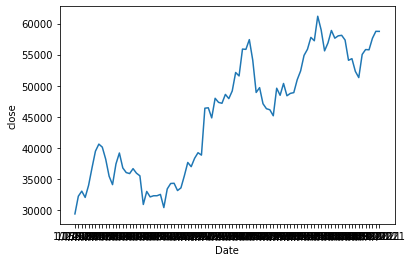

In [8]:
sns.lineplot(data= btc,x= 'Date' , y= 'close')

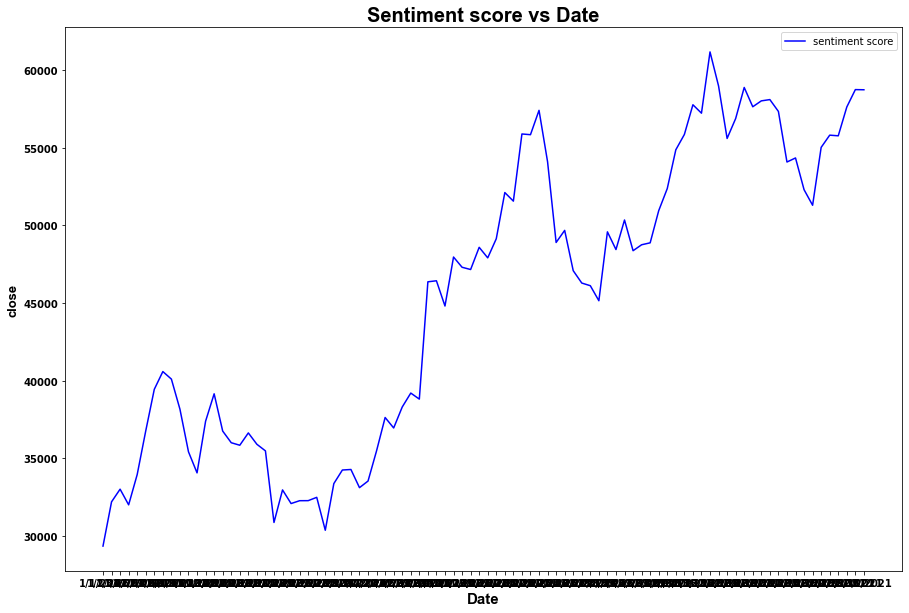

In [9]:
ig = plt.figure(figsize=[15,10])


plt.title('Sentiment score vs Date', fontfamily = 'arial', fontsize=20,fontweight='bold', color= 'black')

plt.plot(btc.Date,btc.close,  label='sentiment score', color ='blue')
plt.xlabel('Date',fontfamily = 'arial', fontsize=15, fontweight= 'bold')
plt.ylabel('close',fontfamily = 'arial', fontsize=13,fontweight= 'bold')
plt.xticks(size=10,fontweight= 'bold')
plt.yticks(size=10,fontweight= 'bold')
plt.legend()

plt.show()

In [10]:
btc['Date'] =  pd.to_datetime(btc['Date'])
score['Date'] =  pd.to_datetime(score['Date'])

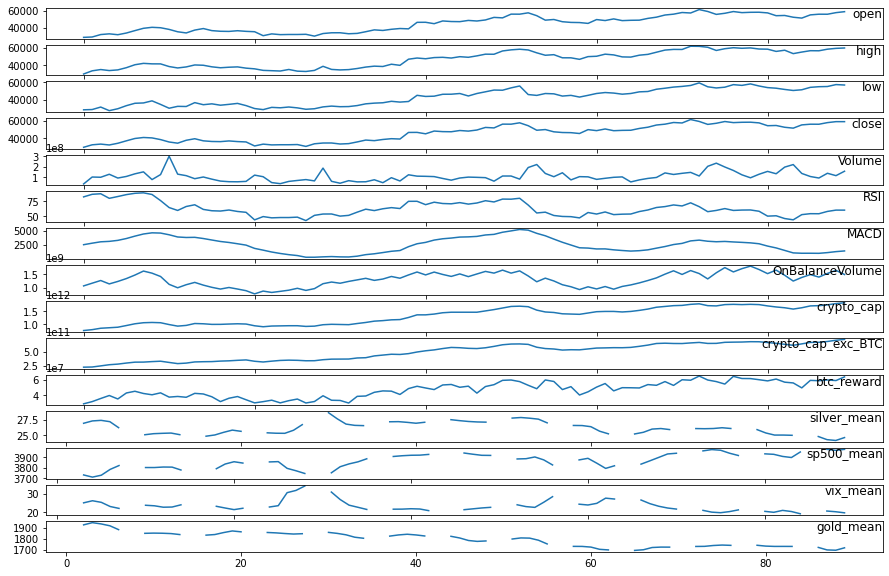

In [11]:
#--------------Analysis----------------------------#

values = btc.values
groups = [1,2,3,4,6,7,8,9,10,11,12,13,14,15,16]
i =1  
pyplot.figure(figsize=(15, 10))
for group in groups:
    pyplot.subplot(len(groups), 1,i)
    pyplot.plot(values[:,group])
    pyplot.title(btc.columns[group], y=.5, loc='right')
    i += 1
pyplot.show()

Pre-processing

In [12]:
btc.isnull().any()

Date                       False
open                       False
high                       False
low                        False
close                      False
Basis                      False
Volume                     False
RSI                        False
MACD                       False
OnBalanceVolume            False
crypto_cap                 False
crypto_cap_exc_BTC         False
btc_reward                 False
silver_mean                 True
sp500_mean                  True
vix_mean                    True
gold_mean                   True
btc_s2f                    False
btc_s2f_price              False
nlp_compound               False
nlp_subjectivity           False
nlp_polarity               False
sentiment_Extreme Fear      True
sentiment_Extreme Greed     True
sentiment_Fear              True
sentiment_Greed             True
sentiment_Neutral           True
sentiment_score            False
dtype: bool

<AxesSubplot:>

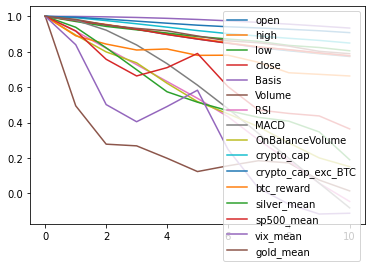

In [13]:
#To fill in missing values, first check for linearity in each column using autocorelation plots
def get_acf(btc_final,lags): 
    frame = []
    for i in range(lags+1):
        frame.append(btc_final.apply(lambda col: col.autocorr(i), axis=0))
    return pd.DataFrame(frame).plot.line()
get_acf(btc.iloc[:,1:17],10)

In [14]:
#fill in missing values using linear interpolation with limit to 10 using autocorelation plot
btc.interpolate(method='linear', inplace=True)

In [15]:
btc = btc.fillna(method='bfill')
btc

,Date,open,high,low,close,Basis,Volume,RSI,MACD,OnBalanceVolume,...,btc_s2f_price,nlp_compound,nlp_subjectivity,nlp_polarity,sentiment_Extreme Fear,sentiment_Extreme Greed,sentiment_Fear,sentiment_Greed,sentiment_Neutral,sentiment_score
0,2021-01-01,28928.8575,29610.6750,28636.5175,29334.3975,24249.47762,3.886240e+07,82.737840,2519.108667,1.066708e+09,...,109681.09600,0.373000,0.447917,0.197630,0.0,1.0,0.0,0.0,0.0,0.145600
1,2021-01-02,29334.4000,33298.2750,28950.6075,32186.0325,24899.99562,1.032998e+08,87.080444,2790.984141,1.170008e+09,...,104893.64760,0.148915,0.443697,0.104015,0.0,1.0,0.0,0.0,0.0,0.154251
2,2021-01-03,32183.5125,34771.7775,31740.2475,33002.5875,25586.53325,1.011861e+08,88.010548,3037.324195,1.271194e+09,...,90095.15488,0.191989,0.339313,0.180712,0.0,0.0,1.0,0.0,0.0,0.155535
3,2021-01-04,33005.3375,33597.2250,27699.5000,31993.4275,26214.92675,1.290905e+08,80.315007,3115.209489,1.142104e+09,...,66441.46718,0.057269,0.359994,0.081835,0.0,0.0,0.0,1.0,0.0,0.123748
4,2021-01-05,31992.3625,34377.1250,29855.3000,33945.3075,26845.14687,9.385325e+07,83.347864,3296.435294,1.235957e+09,...,92072.17542,0.214206,0.393242,0.090378,0.0,0.0,0.0,1.0,0.0,0.158669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021-03-27,55032.3475,56649.8900,53963.7500,55820.2350,56187.35338,1.080836e+08,54.455437,986.456335,1.495418e+09,...,89430.57206,0.109829,0.431457,0.188265,0.0,0.0,0.0,1.0,0.0,0.107450
86,2021-03-28,55820.1850,56547.9375,54681.5100,55777.8575,56357.34412,9.414054e+07,54.347493,973.232275,1.401277e+09,...,89446.57041,0.003050,0.277667,0.084000,0.0,0.0,0.0,1.0,0.0,0.160869
87,2021-03-29,55777.8125,58404.9550,54897.7525,57635.8175,56495.30125,1.383367e+08,58.253998,1099.993912,1.539614e+09,...,106406.77000,0.226853,0.438655,0.081303,0.0,0.0,0.0,1.0,0.0,0.170000
88,2021-03-30,57636.7650,59361.2000,57064.7375,58756.1925,56639.91600,1.161598e+08,60.451683,1276.147685,1.655774e+09,...,119172.90940,0.084079,0.320925,0.085721,0.0,0.0,0.0,1.0,0.0,0.180000


<AxesSubplot:>

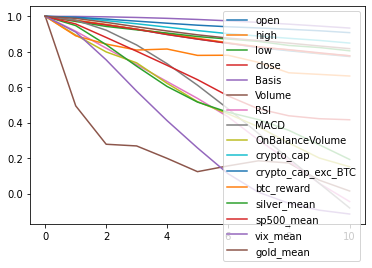

In [16]:
def get_acf(clean_btc,lags): 
    frame = []
    for i in range(lags+1):
        frame.append(clean_btc.apply(lambda col: col.autocorr(i), axis=0))
    return pd.DataFrame(frame).plot.line()
get_acf(btc.iloc[:,1:17],10)

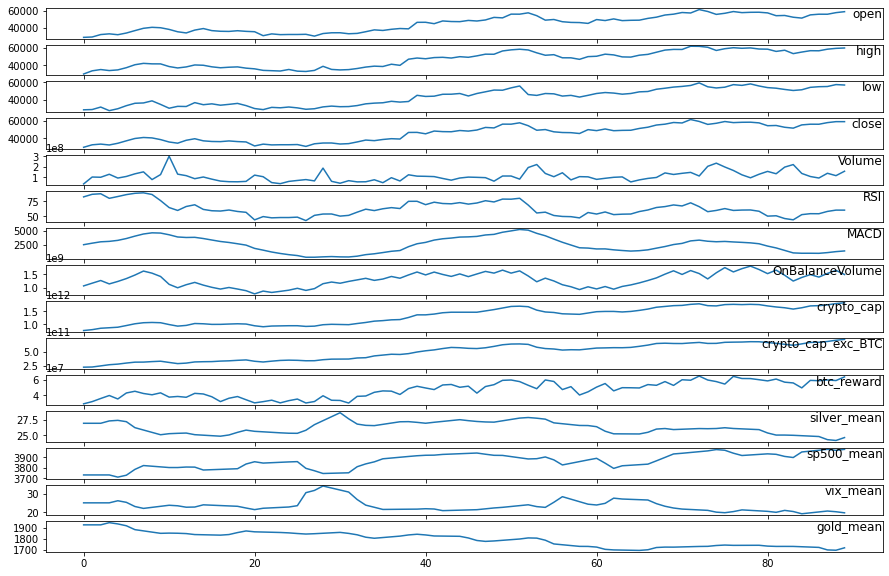

In [17]:
values = btc.values
groups = [1,2,3,4,6,7,8,9,10,11,12,13,14,15,16]
i =1  
pyplot.figure(figsize=(15, 10))
for group in groups:
    pyplot.subplot(len(groups), 1,i)
    pyplot.plot(values[:,group])
    pyplot.title(btc.columns[group], y=.5, loc='right')
    i += 1
pyplot.show()

In [19]:
cols = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,27]
df1 = btc[btc.columns[cols]]

df1

,open,high,low,close,Basis,Volume,RSI,MACD,OnBalanceVolume,crypto_cap,crypto_cap_exc_BTC,btc_reward,silver_mean,sp500_mean,vix_mean,gold_mean,btc_s2f,btc_s2f_price,sentiment_score
0,28928.8575,29610.6750,28636.5175,29334.3975,24249.47762,3.886240e+07,82.737840,2519.108667,1.066708e+09,7.630000e+11,2.200000e+11,29068047.03,26.941000,3732.635000,25.005000,1925.220,54.684866,109681.09600,0.145600
1,29334.4000,33298.2750,28950.6075,32186.0325,24899.99562,1.032998e+08,87.080444,2790.984141,1.170008e+09,7.960000e+11,2.230000e+11,31908499.94,26.941000,3732.635000,25.005000,1925.220,53.963303,104893.64760,0.154251
2,32183.5125,34771.7775,31740.2475,33002.5875,25586.53325,1.011861e+08,88.010548,3037.324195,1.271194e+09,8.500000e+11,2.430000e+11,35922359.22,26.941000,3732.635000,25.005000,1925.220,51.575263,90095.15488,0.155535
3,33005.3375,33597.2250,27699.5000,31993.4275,26214.92675,1.290905e+08,80.315007,3115.209489,1.142104e+09,8.690000e+11,2.640000e+11,39752808.81,27.317500,3732.635000,25.005000,1945.125,47.106159,66441.46718,0.123748
4,31992.3625,34377.1250,29855.3000,33945.3075,26845.14687,9.385325e+07,83.347864,3296.435294,1.235957e+09,8.890000e+11,2.750000e+11,35314776.48,27.409500,3712.445000,26.140000,1933.610,51.909530,92072.17542,0.158669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,55032.3475,56649.8900,53963.7500,55820.2350,56187.35338,1.080836e+08,54.455437,986.456335,1.495418e+09,1.700000e+12,6.640000e+11,59212965.30,24.889167,3953.958333,19.583333,1724.225,51.461742,89430.57206,0.107450
86,55820.1850,56547.9375,54681.5100,55777.8575,56357.34412,9.414054e+07,54.347493,973.232275,1.401277e+09,1.710000e+12,6.660000e+11,58772016.35,24.824500,3962.081667,20.076667,1721.275,51.464481,89446.57041,0.160869
87,55777.8125,58404.9550,54897.7525,57635.8175,56495.30125,1.383367e+08,58.253998,1099.993912,1.539614e+09,1.740000e+12,6.810000e+11,59732041.29,24.322000,3970.205000,20.570000,1698.450,54.193816,106406.77000,0.170000
88,57636.7650,59361.2000,57064.7375,58756.1925,56639.91600,1.161598e+08,60.451683,1276.147685,1.655774e+09,1.790000e+12,7.030000e+11,58978791.98,24.191500,3960.950000,20.185000,1695.685,56.052509,119172.90940,0.180000


<AxesSubplot:>

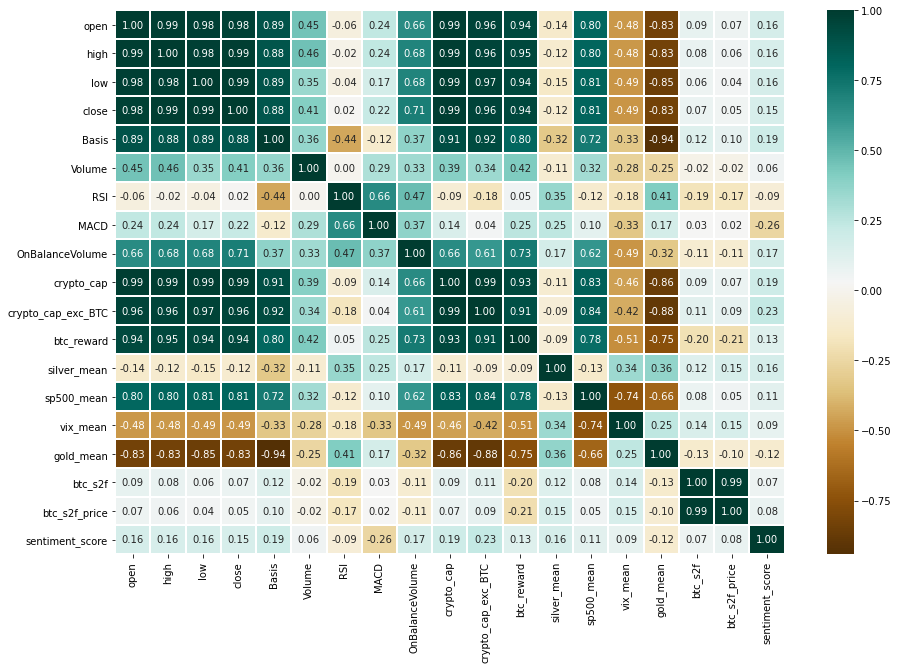

In [20]:
plt.figure(figsize=(15,10))

sns.heatmap(df1.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)


In [46]:
col_x=[ 'open', 'high', 'low','Volume','RSI','MACD','OnBalanceVolume','crypto_cap','crypto_cap_exc_BTC','silver_mean','sp500_mean','vix_mean','gold_mean','sentiment_score', 'close']
df=pd.DataFrame(btc,columns=col_x)

In [47]:
df.isnull().any()

open                  False
high                  False
low                   False
Volume                False
RSI                   False
MACD                  False
OnBalanceVolume       False
crypto_cap            False
crypto_cap_exc_BTC    False
silver_mean           False
sp500_mean            False
vix_mean              False
gold_mean             False
sentiment_score       False
close                 False
dtype: bool

In [48]:
df.tail()

,open,high,low,Volume,RSI,MACD,OnBalanceVolume,crypto_cap,crypto_cap_exc_BTC,silver_mean,sp500_mean,vix_mean,gold_mean,sentiment_score,close
85,55032.3475,56649.8900,53963.7500,1.080836e+08,54.455437,986.456335,1.495418e+09,1.700000e+12,6.640000e+11,24.889167,3953.958333,19.583333,1724.225,0.107450,55820.2350
86,55820.1850,56547.9375,54681.5100,9.414054e+07,54.347493,973.232275,1.401277e+09,1.710000e+12,6.660000e+11,24.824500,3962.081667,20.076667,1721.275,0.160869,55777.8575
87,55777.8125,58404.9550,54897.7525,1.383367e+08,58.253998,1099.993912,1.539614e+09,1.740000e+12,6.810000e+11,24.322000,3970.205000,20.570000,1698.450,0.170000,57635.8175
88,57636.7650,59361.2000,57064.7375,1.161598e+08,60.451683,1276.147685,1.655774e+09,1.790000e+12,7.030000e+11,24.191500,3960.950000,20.185000,1695.685,0.180000,58756.1925
89,58755.7425,59801.0000,56578.7500,1.573535e+08,60.419270,1398.770924,1.498420e+09,1.820000e+12,7.180000e+11,24.655500,3970.075000,19.600000,1717.605,0.190000,58745.5875


In [37]:
# Train/Test split

# Number of periods to incluse in validation split
val_periods = 22

df_train = df[:df.shape[0]-val_periods]
df_val = df[df.shape[0]-val_periods-2:]

print('Train shape', df_train.shape)
print('Validation shape', df_val.shape)


scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_train_scaled.shape

scaler_close_price = MinMaxScaler() # Used to inverse_transform close price prediction data
train_close_price = scaler_close_price.fit(df_train.close.values.reshape(-1,1))

Train shape (68, 15)
Validation shape (24, 15)


<AxesSubplot:>

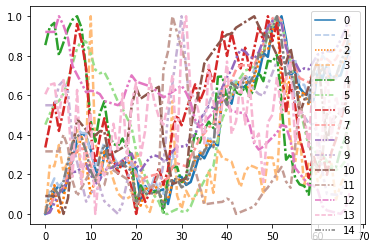

In [61]:
sns.lineplot(data=df_train_scaled, palette="tab20", linewidth=2.5)

In [ ]:
# Transforms the original time series into the input formar required by the LSTM model

nb_timesteps = 2

def makeXy(ts, nb_timesteps, features='itself'): 
    """ 
    Input:  
           ts: original scaled time series 
           nb_timesteps: number of time steps in the regressors 
           features: itself == use the previous values of the label only
                     all == use previous values of all avaialable data
    Output:  
           X: 2-D array of regressors 
           y: 1-D array of target  
   """
    x_train = []
    y_train = []

    for i in range(nb_timesteps, ts.shape[0]):
        if features == 'itself':
            x_train.append(ts[i-nb_timesteps:i,:-1])
        else:
            x_train.append(ts[i-nb_timesteps:i,0:])
        y_train.append(ts[i, -1])

    x_train, y_train = np.array(x_train), np.array(y_train)
    return x_train, y_train 


X_train, y_train = makeXy(df_train_scaled, nb_timesteps ,'all')
X_train.shape

In [129]:
# Reshape validation data
data = pd.concat([df_train, df_val], axis=0)
data.reset_index(inplace=True, drop=True)

val_inputs = data[df_train_scaled.shape[0]-nb_timesteps:].values

# Scale validation inputs
val_inputs = scaler.transform(val_inputs)

X_val, y_val = makeXy(val_inputs, nb_timesteps,'all')
X_val.shape

(24, 2, 15)

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
# Define LSTM Neural Network
regressor = Sequential()

regressor.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(LSTM(units=500, return_sequences=True, ))
regressor.add(Dropout(rate=0.3))
regressor.add(LSTM(units=250, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(rate = 0.1))
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate = 0.1))
regressor.add(Dense(units=1))


regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 500)            1032000   
                                                                 
 dropout_4 (Dropout)         (None, 2, 500)            0         
                                                                 
 lstm_5 (LSTM)               (None, 2, 250)            751000    
                                                                 
 dropout_5 (Dropout)         (None, 2, 250)            0         
                                                                 
 lstm_6 (LSTM)               (None, 2, 100)            140400    
                                                                 
 dropout_6 (Dropout)         (None, 2, 100)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [131]:
# Create directory to save model
!mkdir "keras_models_lstm1D_Multivariate"

A subdirectory or file keras_models_lstm1D_Multivariate already exists.


In [132]:
# Fit and save best parameters of model
epoch = 25

# Compiler and loss function
regressor.compile(loss='mean_squared_error', optimizer='adam')

# Model Checkpoint
model_folder ='keras_models_lstm1D_Multivariate'
model_file = 'BTC_close_price_lstm_weights_MV.{epoch:02d}-{val_loss:.4f}.hdf5'
save_weights_at = os.path.join(model_folder, model_file) 
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0, 
                            save_best_only=True, save_weights_only=False, mode='min', 
                            save_freq='epoch') 
# Fit model
regressor.fit(x=X_train, y=y_train, batch_size=32, epochs=epoch, 
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val), 
             shuffle=True) 

Epoch 1/25
3/3 [==============================] - 10s 979ms/step - loss: 0.2671 - val_loss: 0.8244
Epoch 2/25
3/3 [==============================] - 0s 68ms/step - loss: 0.2197 - val_loss: 0.6044
Epoch 3/25
3/3 [==============================] - 0s 78ms/step - loss: 0.1318 - val_loss: 0.2203
Epoch 4/25
3/3 [==============================] - 0s 73ms/step - loss: 0.0344 - val_loss: 0.0103
Epoch 5/25
3/3 [==============================] - 0s 98ms/step - loss: 0.0834 - val_loss: 0.0076
Epoch 6/25
3/3 [==============================] - 0s 43ms/step - loss: 0.0471 - val_loss: 0.0889
Epoch 7/25
3/3 [==============================] - 0s 44ms/step - loss: 0.0291 - val_loss: 0.1973
Epoch 8/25
3/3 [==============================] - 0s 44ms/step - loss: 0.0428 - val_loss: 0.2172
Epoch 9/25
3/3 [==============================] - 0s 44ms/step - loss: 0.0453 - val_loss: 0.1583
Epoch 10/25
3/3 [==============================] - 0s 43ms/step - loss: 0.0318 - val_loss: 0.0831
Epoch 11/25
3/3 [==========

In [133]:
#regressor.load_weights(model_folder + '\\' + 'BTC_close_price_lstm_weights_MV.75-0.0253.hdf5')
# Validation predict
predicted_price = regressor.predict(X_val)
predicted_price = scaler_close_price.inverse_transform(predicted_price)
predicted_price = predicted_price.reshape(X_val.shape[0])

# Train predict
predicted_price_train = regressor.predict(X_train)
predicted_price_train = scaler_close_price.inverse_transform(predicted_price_train)
predicted_price_train = predicted_price_train.reshape(X_train.shape[0])

3/3 [==============================] - 0s 9ms/step


In [134]:
from sklearn.utils.validation import check_consistent_length, check_array
def mean_absolute_percentage_error(y_true, y_pred,
                                   sample_weight=None,
                                   multioutput='uniform_average'):
    """Mean absolute percentage error regression loss.
    Note here that we do not represent the output as a percentage in range
    [0, 100]. Instead, we represent it in range [0, 1/eps]. Read more in the
    :ref:`User Guide <mean_absolute_percentage_error>`.
    .. versionadded:: 0.24
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    multioutput : {'raw_values', 'uniform_average'} or array-like
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
        If input is list then the shape must be (n_outputs,).
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
        'uniform_average' :
            Errors of all outputs are averaged with uniform weight.
    Returns
    -------
    loss : float or ndarray of floats in the range [0, 1/eps]
        If multioutput is 'raw_values', then mean absolute percentage error
        is returned for each output separately.
        If multioutput is 'uniform_average' or an ndarray of weights, then the
        weighted average of all output errors is returned.
        MAPE output is non-negative floating point. The best value is 0.0.
        But note the fact that bad predictions can lead to arbitarily large
        MAPE values, especially if some y_true values are very close to zero.
        Note that we return a large value instead of `inf` when y_true is zero.
    
    """
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
        y_true, y_pred, multioutput)
    check_consistent_length(y_true, y_pred, sample_weight)
    epsilon = np.finfo(np.float64).eps
    mape = np.abs(y_pred - y_true) / np.maximum(np.abs(y_true), epsilon)
    output_errors = np.average(mape,
                               weights=sample_weight, axis=0)
    if isinstance(multioutput, str):
        if multioutput == 'raw_values':
            return output_errors
        elif multioutput == 'uniform_average':
            # pass None as weights to np.average: uniform mean
            multioutput = None

    return np.average(output_errors, weights=multioutput)

def _check_reg_targets(y_true, y_pred, multioutput, dtype="numeric"):
    """Check that y_true and y_pred belong to the same regression task.
    Parameters
    ----------
    y_true : array-like
    y_pred : array-like
    multioutput : array-like or string in ['raw_values', uniform_average',
        'variance_weighted'] or None
        None is accepted due to backward compatibility of r2_score().
    Returns
    -------
    type_true : one of {'continuous', continuous-multioutput'}
        The type of the true target data, as output by
        'utils.multiclass.type_of_target'.
    y_true : array-like of shape (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples, n_outputs)
        Estimated target values.
    multioutput : array-like of shape (n_outputs) or string in ['raw_values',
        uniform_average', 'variance_weighted'] or None
        Custom output weights if ``multioutput`` is array-like or
        just the corresponding argument if ``multioutput`` is a
        correct keyword.
    dtype : str or list, default="numeric"
        the dtype argument passed to check_array.
    """
    check_consistent_length(y_true, y_pred)
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)

    if y_true.ndim == 1:
        y_true = y_true.reshape((-1, 1))

    if y_pred.ndim == 1:
        y_pred = y_pred.reshape((-1, 1))

    if y_true.shape[1] != y_pred.shape[1]:
        raise ValueError("y_true and y_pred have different number of output "
                         "({0}!={1})".format(y_true.shape[1], y_pred.shape[1]))

    n_outputs = y_true.shape[1]
    allowed_multioutput_str = ('raw_values', 'uniform_average',
                               'variance_weighted')
    if isinstance(multioutput, str):
        if multioutput not in allowed_multioutput_str:
            raise ValueError("Allowed 'multioutput' string values are {}. "
                             "You provided multioutput={!r}".format(
                                 allowed_multioutput_str,
                                 multioutput))
    elif multioutput is not None:
        multioutput = check_array(multioutput, ensure_2d=False)
        if n_outputs == 1:
            raise ValueError("Custom weights are useful only in "
                             "multi-output cases.")
        elif n_outputs != len(multioutput):
            raise ValueError(("There must be equally many custom weights "
                              "(%d) as outputs (%d).") %
                             (len(multioutput), n_outputs))
    y_type = 'continuous' if n_outputs == 1 else 'continuous-multioutput'

    return y_type, y_true, y_pred, multioutput


In [83]:
from sklearn.metrics import mean_squared_error

print('Train RMSE:')
print(mean_squared_error(df_train[:df_train.shape[0]-nb_timesteps].close, predicted_price_train, squared=False))
train_rmse = np.sqrt(np.mean(np.square(df_train[:df_train.shape[0]-nb_timesteps].close-predicted_price_train)))


print('Validation RMSE:')
print(mean_squared_error(df_val['close'],predicted_price, squared=False))
test_rmse = np.sqrt(np.mean(np.square(df_val['close']-predicted_price)))

Train RMSE:
2868.898091632003
Validation RMSE:
2461.8218519409884


In [33]:
print('Train MAPE:')
print( mean_absolute_percentage_error(df_train[:df_train.shape[0]-nb_timesteps].close, predicted_price_train)*100)
train_mape = mean_absolute_percentage_error(df_train[:df_train.shape[0]-nb_timesteps].close, predicted_price_train)*100

print('Validation MAPE:')
print(mean_absolute_percentage_error(df_val['close'],predicted_price)*100)
test_mape =mean_absolute_percentage_error(df_val['close'],predicted_price)*100

Train MAPE:
3.43564544869407
Validation MAPE:
4.986147974671909


<AxesSubplot:>

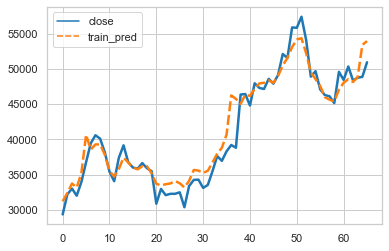

In [34]:
train_results = pd.DataFrame(df_train['close'][:df_train.shape[0]-nb_timesteps])
train_results['train_pred'] = predicted_price_train
sns.set_theme(style="whitegrid")

sns.lineplot(data=train_results, palette="tab10", linewidth=2.5)

<AxesSubplot:>

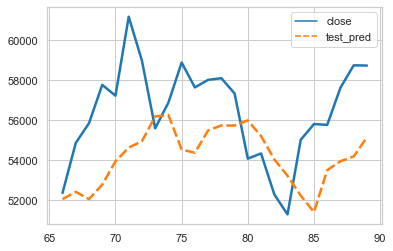

In [35]:
test_results = pd.DataFrame(df_val.close)
test_results['test_pred'] = predicted_price
sns.set_theme(style="whitegrid")

sns.lineplot(data=test_results, palette="tab10", linewidth=2.5)


<AxesSubplot:>

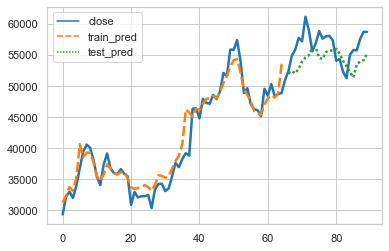

In [36]:
total_results = pd.concat([train_results,test_results])
sns.set_theme(style="whitegrid")

sns.lineplot(data=total_results, palette="tab10", linewidth=2.5)